# Using time series methods for prediction

In [9]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plt
from collections import Counter
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv('DFI-final_df.csv')

for pt in df.product_Type.unique()[5:6]:
    print('===================\n%s\n==================='%pt)
    single_pt_df = df[df['product_Type']==pt].groupby(['TimeSeries_Date']).agg({"TimeSeries_price":['min','max']})
    single_pt_df = single_pt_df.reset_index()
    single_pt_df.columns = ['time_point','min','max']
    single_pt_df['range'] = single_pt_df['max'] - single_pt_df['min']
        
    # print(single_pt_df,'*'*80,'\n\n\n')
        
    cols_name = ['min','max','range']
    for col in cols_name[:1]:
        dataset = single_pt_df[col].values.astype('float32').reshape(-1,1)
        # normalize the dataset , to the range of 0-to-1
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)
        #print(dataset[:10])
        train_size = int(len(dataset) * 0.8)
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        #print((train).shape, len(test))
        
        verbose = 0
        show_plt = 1
        #print(len(trainX))
        #print(len(trainX[0]))
        
        

car & truck


# Testing the Stationarity

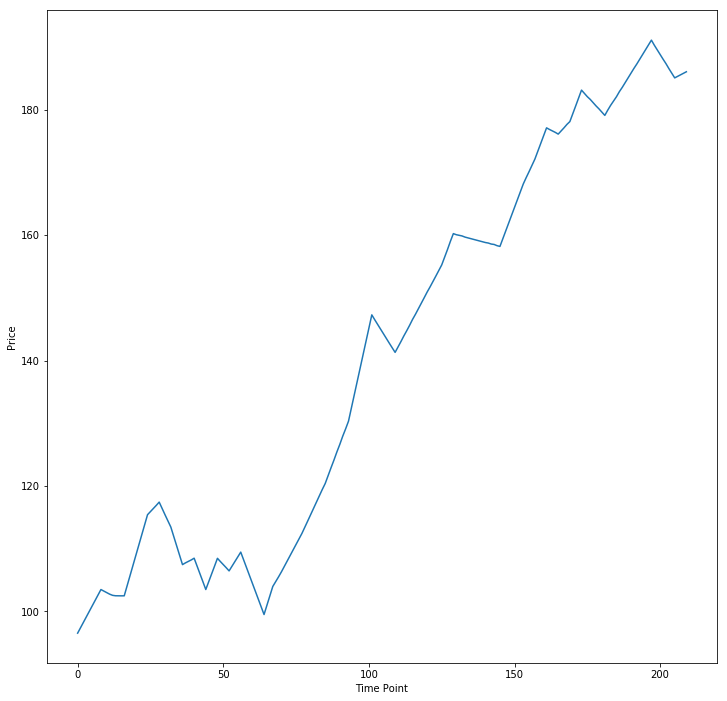

In [11]:
plt.figure(figsize=(12,12))
plt.plot(scaler.inverse_transform(dataset))
plt.xlabel("Time Point")
plt.ylabel("Price")
#plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.show()
print('\n')    

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations.

but more formally, we can check stationarity using the following:

1. Plotting Rolling Statistics: 
We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last (n) values, i.e. last 12 time points. But again this is more of a visual technique.

2. Dickey-Fuller Test:
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

Interpretation of p value

1. p value > 0.05: Accepts the Null Hypothesis (H0), the data has a unit root and is non-stationary.

2. p value < = 0.05: Rejects the Null Hypothesis (H0), the data is stationary.

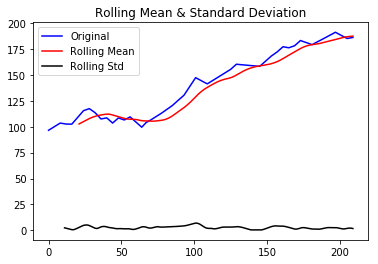

ADF Stastistic: -0.451341
p-value: 0.901167
The graph is non stationery
Critical values:
	5%: -2.876 
	1%: -3.464 
	10%: -2.575 


In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = single_pt_df['min']      
test_stationarity(ts)

# Log Transforming the series
Log transformation is used to unskew highly skewed data. Thus helping in forecasting process.

check the stationarity again.

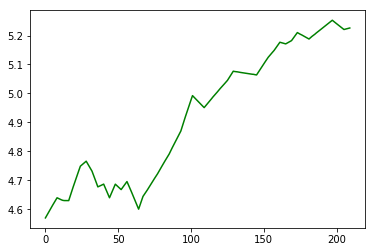

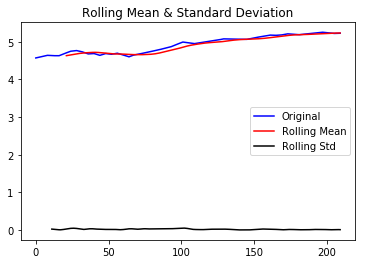

ADF Stastistic: -0.790385
p-value: 0.821930
The graph is non stationery
Critical values:
	5%: -2.876 
	1%: -3.464 
	10%: -2.575 


In [13]:
ts_log = np.log(ts)
plt.plot(ts_log,color="green")
plt.show()

test_stationarity(ts_log)

The series is still non stationary as p value is still greater than 0.05 so we need to make further transformations
# Remove trend and seasonality with differencing
In case of differencing to make the time series stationary the current value is subtracted with the previous values. Due to this the mean is stabilized and hence the chances of stationarity of time series are increased.

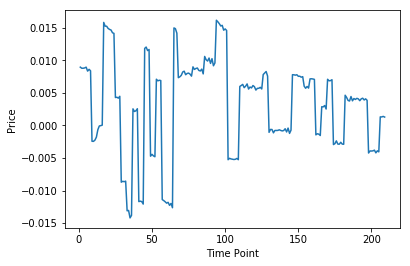

In [14]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.xlabel("Time Point")
plt.ylabel("Price")
plt.show()

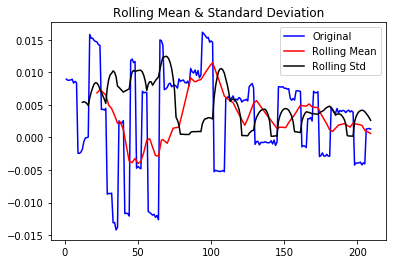

ADF Stastistic: -3.196332
p-value: 0.020198
The graph is stationery
Critical values:
	5%: -2.876 
	1%: -3.464 
	10%: -2.575 


In [15]:
# test the stationarity
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Our time series is now stationary as p value is less than 0.05 therefore we can apply time series forecasting models.